In [1]:
import pandas as pd

In [2]:
twitter_data = pd.read_excel("./bpjs-20221109-123449.xlsx")
twitter_data.head()

,Unnamed: 0,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,0,1590216138642034944,@worksfess Berkasnya dipersulit buat persyarat...,0,0,2022-11-09 05:34:06,Twitter for Android,1.590185e+18,worksfess,0,0
1,1,1590215686944887040,@KacaLuthf1 udh dicover bpjs aja pasti ada pen...,0,0,2022-11-09 05:32:19,Twitter Web App,1.590213e+18,KacaLuthf1,0,0
2,2,1590215636286083072,RT @kafiradikalis: ...Mantep pelayanan klinik ...,0,1,2022-11-09 05:32:07,Twitter Web App,NaN,NaN,1,0
3,3,1590215293707514112,[titipan] di rsnd undip bisa buat konsul psiki...,1,0,2022-11-09 05:30:45,smngt kuliahnya dips! jgn gila,NaN,NaN,0,1
4,4,1590215214762689024,@18fessss Cepet periksa ke obgyn pk bpjs,0,0,2022-11-09 05:30:26,Twitter for iPhone,1.590014e+18,18fessss,0,0


In [3]:
def first_clean(df):
    df.dropna()
    df.drop_duplicates()

In [4]:
df = pd.DataFrame(data=twitter_data['text'])
first_clean(df)
for text in df["text"]:
    print(text)

@worksfess Berkasnya dipersulit buat persyaratan bpjs nanti
@KacaLuthf1 udh dicover bpjs aja pasti ada pengeluaran pribadi lain2 ga sih menyangkut perawatannya :( 
kalo ga pak… https://t.co/i57OZtvH4U
RT @kafiradikalis: ...Mantep pelayanan klinik eksekutif di RSHS Bandung.

Yg penting tinggal bawa uang aja langsung sat set ditangani...Sem…
[titipan] di rsnd undip bisa buat konsul psikiater ga? semisal kalo gapake bpjs range harga nya berapa ya, makasih -dips!
@18fessss Cepet periksa ke obgyn pk bpjs
@worksfess Kalo di daerahku udah gede segitu mah 😁 bpjs ketenagakerjaan aku juga daftar bayar mandiri bisa kok.
RT @Bank_Aconk: Penyaluran BLT DIPERLUAS: dari UMKM hingga Ojek Online

Penyaluran BLT 2022 akan diperluas setelah warga miskin dan pekerja…
💚 sebenernya aku punya bpjs dan sering ke kesmas juga tanpa bayar, tp kalo kesana tanpa bawa duit kira² bakal bayar gak ya 😭
...Mantep pelayanan klinik eksekutif di RSHS Bandung.

Yg penting tinggal bawa uang aja langsung sat set ditangani.… 

# Cleaning

In [5]:
#Melakukan data cleaning untuk membersihkan text dari tab, hastag, link,dll
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

#data cleaning 
def clean(text):
    # tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    
    text = text.replace("RT :", "")
    #incomplete URL
    return text.replace("http://", "").replace("https://", " ")
       
#mendeklarasikan fungsi 
df['text'] = df['text'].apply(clean)

#menampilkan df
for text in df["text"]:
    print(text)

Berkasnya dipersulit buat persyaratan bpjs nanti
udh dicover bpjs aja pasti ada pengeluaran pribadi lain2 ga sih menyangkut perawatannya :( kalo ga pak?
 ...Mantep pelayanan klinik eksekutif di RSHS Bandung. Yg penting tinggal bawa uang aja langsung sat set ditangani...Sem?
[titipan] di rsnd undip bisa buat konsul psikiater ga? semisal kalo gapake bpjs range harga nya berapa ya, makasih -dips!
Cepet periksa ke obgyn pk bpjs
Kalo di daerahku udah gede segitu mah ? bpjs ketenagakerjaan aku juga daftar bayar mandiri bisa kok.
RT _Aconk: Penyaluran BLT DIPERLUAS: dari UMKM hingga Ojek Online Penyaluran BLT 2022 akan diperluas setelah warga miskin dan pekerja?
? sebenernya aku punya bpjs dan sering ke kesmas juga tanpa bayar, tp kalo kesana tanpa bawa duit kira? bakal bayar gak ya ?
...Mantep pelayanan klinik eksekutif di RSHS Bandung. Yg penting tinggal bawa uang aja langsung sat set ditangani.?
 Penyaluran bantuan langsung tunai (BLT) 2022 akan diperluas. Setelah warga miskin dan pekerja 

In [6]:
df.head()

,text
0,Berkasnya dipersulit buat persyaratan bpjs nanti
1,udh dicover bpjs aja pasti ada pengeluaran pri...
2,...Mantep pelayanan klinik eksekutif di RSHS ...
3,[titipan] di rsnd undip bisa buat konsul psiki...
4,Cepet periksa ke obgyn pk bpjs


In [7]:
#Menghapus tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['text'] = df['text'].apply(remove_punctuation)
df

,text
0,Berkasnya dipersulit buat persyaratan bpjs nanti
1,udh dicover bpjs aja pasti ada pengeluaran pri...
2,Mantep pelayanan klinik eksekutif di RSHS Ban...
3,titipan di rsnd undip bisa buat konsul psikiat...
4,Cepet periksa ke obgyn pk bpjs
...,...
95,GP mode on Dok jangan kebanyakan rujuk Nanti ...
96,Penyaluran bantuan langsung tunai BLT 2022 ak...
97,Sudah Tapi malah disuruh menghubungi DM CS Kem...
98,CW Gaji Minta Pendapat Work Tapi gadapet bpj...


In [8]:
#Menghilangkan whitespace
def remove_whitespace_LT(text):
    return text.strip()

df['text'] = df['text'].apply(remove_whitespace_LT)

#Menghilangkan multiple whitespace menjadi single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['text'] = df['text'].apply(remove_whitespace_multiple)
df

,text
0,Berkasnya dipersulit buat persyaratan bpjs nanti
1,udh dicover bpjs aja pasti ada pengeluaran pri...
2,Mantep pelayanan klinik eksekutif di RSHS Band...
3,titipan di rsnd undip bisa buat konsul psikiat...
4,Cepet periksa ke obgyn pk bpjs
...,...
95,GP mode on Dok jangan kebanyakan rujuk Nanti k...
96,Penyaluran bantuan langsung tunai BLT 2022 aka...
97,Sudah Tapi malah disuruh menghubungi DM CS Kem...
98,CW Gaji Minta Pendapat Work Tapi gadapet bpjs ...


In [9]:
#Menghilangkan emoji
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)
df['text'] = df['text'].apply(deEmojify)
df

,text
0,Berkasnya dipersulit buat persyaratan bpjs nanti
1,udh dicover bpjs aja pasti ada pengeluaran pri...
2,Mantep pelayanan klinik eksekutif di RSHS Band...
3,titipan di rsnd undip bisa buat konsul psikiat...
4,Cepet periksa ke obgyn pk bpjs
...,...
95,GP mode on Dok jangan kebanyakan rujuk Nanti k...
96,Penyaluran bantuan langsung tunai BLT 2022 aka...
97,Sudah Tapi malah disuruh menghubungi DM CS Kem...
98,CW Gaji Minta Pendapat Work Tapi gadapet bpjs ...


In [10]:
# remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['text'] = df['text'].apply(remove_single_char)
df

,text
0,Berkasnya dipersulit buat persyaratan bpjs nanti
1,udh dicover bpjs aja pasti ada pengeluaran pri...
2,Mantep pelayanan klinik eksekutif di RSHS Band...
3,titipan di rsnd undip bisa buat konsul psikiat...
4,Cepet periksa ke obgyn pk bpjs
...,...
95,GP mode on Dok jangan kebanyakan rujuk Nanti k...
96,Penyaluran bantuan langsung tunai BLT 2022 aka...
97,Sudah Tapi malah disuruh menghubungi DM CS Kem...
98,CW Gaji Minta Pendapat Work Tapi gadapet bpjs ...


# Case Folding

In [12]:
#case folding
df['text'] = df['text'].str.lower()
df

,text
0,berkasnya dipersulit buat persyaratan bpjs nanti
1,udh dicover bpjs aja pasti ada pengeluaran pri...
2,mantep pelayanan klinik eksekutif di rshs band...
3,titipan di rsnd undip bisa buat konsul psikiat...
4,cepet periksa ke obgyn pk bpjs
...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...
96,penyaluran bantuan langsung tunai blt 2022 aka...
97,sudah tapi malah disuruh menghubungi dm cs kem...
98,cw gaji minta pendapat work tapi gadapet bpjs ...




# Tokenize

In [13]:
# NLTK word tokenize 
import nltk

def word_tokenize_wrapper(text):
    return nltk.word_tokenize(text)

df['tokenize'] = df['text'].apply(word_tokenize_wrapper)
df

,text,tokenize
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj..."
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua..."
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh..."
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,..."
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]"
...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,..."
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20..."
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,..."
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape..."


In [14]:
#Freqdist untuk mendapatkan informasi frekuensi kemunculan setiap token

# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

df['freq'] = df['tokenize'].apply(freqDist_wrapper)

 
df['freq']= df['freq'].apply(lambda x : x.most_common())
df

,text,tokenize,freq
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj...","[(berkasnya, 1), (dipersulit, 1), (buat, 1), (..."
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua...","[(ga, 2), (udh, 1), (dicover, 1), (bpjs, 1), (..."
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh...","[(mantep, 1), (pelayanan, 1), (klinik, 1), (ek..."
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,...","[(titipan, 1), (di, 1), (rsnd, 1), (undip, 1),..."
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]","[(cepet, 1), (periksa, 1), (ke, 1), (obgyn, 1)..."
...,...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,...","[(gp, 1), (mode, 1), (on, 1), (dok, 1), (janga..."
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20...","[(penyaluran, 1), (bantuan, 1), (langsung, 1),..."
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,...","[(sudah, 1), (tapi, 1), (malah, 1), (disuruh, ..."
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape...","[(cw, 1), (gaji, 1), (minta, 1), (pendapat, 1)..."


# Stop Removal

In [19]:
from nltk.corpus import stopwords

# get stopword indonesia
list_stopwords = stopwords.words('indonesian')

# stopword tambahan
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah','bak','haii'])



In [20]:
import pandas as pd
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))
# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)

In [21]:
list_stopwords

{'belakangan',
 '',
 'siep',
 'biasa',
 'np',
 'third',
 'gate',
 'sebanyak',
 'iyaa',
 'ker',
 'er',
 'sela',
 'kepa',
 'ndy',
 'ho',
 'seseorang',
 'ditunjukkannya',
 'nih',
 'menanti-nanti',
 'merasa',
 'bnyk',
 'yee',
 'akhiri',
 'bilang',
 'bahkan',
 'share',
 'f',
 'dimulainya',
 'diketahuinya',
 'inginkan',
 'kamu',
 'mulailah',
 'sekarang',
 'sud',
 'aga',
 'jelaskan',
 'mpod',
 'dekat',
 'terlihat',
 'lum',
 'k',
 'orang',
 'ae',
 'syi',
 'lanjutnya',
 'lur',
 'kerna',
 'sana',
 'seh',
 'dikatakannya',
 'haiii',
 'sepanjang',
 'gmn',
 'aplagi',
 'ndezz',
 'ngoahahahahahaaa',
 'bulan',
 'karena',
 'kelamaan',
 'jagan',
 'cuy',
 'eiy',
 'mp',
 'hadech',
 'mengira',
 'ber',
 'smple',
 'harus',
 'yess',
 'sangkut',
 'si',
 'bahahaha',
 'pre',
 'dikarenakan',
 'seingat',
 'nyg',
 'cukup',
 'me',
 'ba',
 'pastilah',
 'woii',
 'usah',
 'semisal',
 'ab',
 'drpd',
 'bahwasannya',
 'kok',
 'aah',
 'tambahnya',
 'selama',
 'berarti',
 'nyaaa',
 'bila',
 'bukankah',
 'uhuii',
 'diinginkan

In [22]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]
df['stopw'] = df['tokenize'].apply(stopwords_removal) 

df

,text,tokenize,freq,stopw
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj...","[(berkasnya, 1), (dipersulit, 1), (buat, 1), (...","[berkasnya, dipersulit, persyaratan, bpjs]"
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua...","[(ga, 2), (udh, 1), (dicover, 1), (bpjs, 1), (...","[udh, dicover, bpjs, pengeluaran, pribadi, lai..."
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh...","[(mantep, 1), (pelayanan, 1), (klinik, 1), (ek...","[mantep, pelayanan, klinik, eksekutif, rshs, b..."
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,...","[(titipan, 1), (di, 1), (rsnd, 1), (undip, 1),...","[titipan, rsnd, undip, konsul, psikiater, gapa..."
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]","[(cepet, 1), (periksa, 1), (ke, 1), (obgyn, 1)...","[cepet, periksa, obgyn, pk, bpjs]"
...,...,...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,...","[(gp, 1), (mode, 1), (on, 1), (dok, 1), (janga...","[gp, mode, dok, kebanyakan, rujuk, peringatan,..."
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20...","[(penyaluran, 1), (bantuan, 1), (langsung, 1),...","[penyaluran, bantuan, tunai, blt, 2022, diperl..."
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,...","[(sudah, 1), (tapi, 1), (malah, 1), (disuruh, ...","[disuruh, menghubungi, dm, cs, kemnaker, nik]"
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape...","[(cw, 1), (gaji, 1), (minta, 1), (pendapat, 1)...","[cw, gaji, pendapat, work, gadapet, bpjs, seje..."


# Normalisasi

In [24]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

df['normalization'] = df['stopw'].apply(normalized_term)

df

,text,tokenize,freq,stopw,normalization
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj...","[(berkasnya, 1), (dipersulit, 1), (buat, 1), (...","[berkasnya, dipersulit, persyaratan, bpjs]","[berkasnya, dipersulit, persyaratan, bpjs]"
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua...","[(ga, 2), (udh, 1), (dicover, 1), (bpjs, 1), (...","[udh, dicover, bpjs, pengeluaran, pribadi, lai...","[sudah, dicover, bpjs, pengeluaran, pribadi, l..."
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh...","[(mantep, 1), (pelayanan, 1), (klinik, 1), (ek...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, pelayanan, klinik, eksekutif, rshs, b..."
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,...","[(titipan, 1), (di, 1), (rsnd, 1), (undip, 1),...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titipan, rsnd, undip, konsul, psikiater, gapa..."
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]","[(cepet, 1), (periksa, 1), (ke, 1), (obgyn, 1)...","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]"
...,...,...,...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,...","[(gp, 1), (mode, 1), (on, 1), (dok, 1), (janga...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, kebanyakan, rujuk, peringatan,..."
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20...","[(penyaluran, 1), (bantuan, 1), (langsung, 1),...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[penyaluran, bantuan, tunai, blt, 2022, diperl..."
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,...","[(sudah, 1), (tapi, 1), (malah, 1), (disuruh, ...","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[disuruh, menghubungi, dm, cs, kemnaker, nik]"
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape...","[(cw, 1), (gaji, 1), (minta, 1), (pendapat, 1)...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, pendapat, work, gadapet, bpjs, seje..."


# Stemming

In [27]:
#Memanggil library sastrawi 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['steem'] = df['normalization'].swifter.apply(get_stemmed_term)
df

478
------------------------
berkasnya : berkas
dipersulit : sulit
persyaratan : syarat
bpjs : bpjs
sudah : sudah
dicover : dicover
pengeluaran : keluar
pribadi : pribadi
lain2 : lain2
perawatannya : awat
mantep : mantep
pelayanan : layan
klinik : klinik
eksekutif : eksekutif
rshs : rshs
bandung : bandung
tinggal : tinggal
bawa : bawa
uang : uang
sat : sat
set : set
ditanganisem : ditanganisem
titipan : titip
rsnd : rsnd
undip : undip
konsul : konsul
psikiater : psikiater
gapake : gapake
range : range
harga : harga
makasih : makasih
dips : dips
cepet : cepet
periksa : periksa
obgyn : obgyn
pk : pk
daerahku : daerah
gede : gede
segitu : segitu
ketenagakerjaan : ketenagakerjaan
daftar : daftar
bayar : bayar
mandiri : mandiri
aconk : aconk
penyaluran : salur
blt : blt
diperluas : luas
umkm : umkm
ojek : ojek
online : online
2022 : 2022
warga : warga
miskin : miskin
pekerja : kerja
sebenernya : sebenernya
kesmas : kesmas
kesana : kesana
duit : duit
ditangani : tangan
bantuan : bantu
tunai 

Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

,text,tokenize,freq,stopw,normalization,steem
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj...","[(berkasnya, 1), (dipersulit, 1), (buat, 1), (...","[berkasnya, dipersulit, persyaratan, bpjs]","[berkasnya, dipersulit, persyaratan, bpjs]","[berkas, sulit, syarat, bpjs]"
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua...","[(ga, 2), (udh, 1), (dicover, 1), (bpjs, 1), (...","[udh, dicover, bpjs, pengeluaran, pribadi, lai...","[sudah, dicover, bpjs, pengeluaran, pribadi, l...","[sudah, dicover, bpjs, keluar, pribadi, lain2,..."
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh...","[(mantep, 1), (pelayanan, 1), (klinik, 1), (ek...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, layan, klinik, eksekutif, rshs, bandu..."
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,...","[(titipan, 1), (di, 1), (rsnd, 1), (undip, 1),...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titip, rsnd, undip, konsul, psikiater, gapake..."
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]","[(cepet, 1), (periksa, 1), (ke, 1), (obgyn, 1)...","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]"
...,...,...,...,...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,...","[(gp, 1), (mode, 1), (on, 1), (dok, 1), (janga...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, banyak, rujuk, ingat, bpjs, hh..."
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20...","[(penyaluran, 1), (bantuan, 1), (langsung, 1),...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[salur, bantu, tunai, blt, 2022, luas, warga, ..."
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,...","[(sudah, 1), (tapi, 1), (malah, 1), (disuruh, ...","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[suruh, hubung, dm, cs, kemnaker, nik]"
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape...","[(cw, 1), (gaji, 1), (minta, 1), (pendapat, 1)...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, dapat, work, gadapet, bpjs, jenis, ..."


In [32]:
import time
timestr = time.strftime("%Y%m%d-%H%M%S")
df.to_excel("bpjs-clean-{}.xlsx".format(timestr))

# Visualisasi

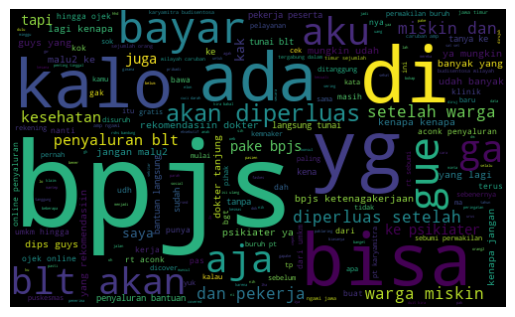

In [18]:
#Memvisualisasikan data 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# plot the word cloud 
allWord = ' '.join([twts for twts in df['text']])
#sekarang kita akan memanggil verbal word cloud
wordCloud = WordCloud(width = 500,height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

# Modeling Data

In [30]:
from textblob import TextBlob
#mendeklarasikan subjektif
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

#mendeklarasikan Polarity
def getPola(text):
    a = TextBlob(text)
    translated = a.translate(from_lang="id", to="en")
    return translated.sentiment.polarity

df['subjectivity'] = df['text'].apply(getSubject)
df['polarity'] = df['text'].apply(getPola)
df

,text,tokenize,freq,stopw,normal,steem,subjectivity,polarity
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj...","[(berkasnya, 1), (dipersulit, 1), (buat, 1), (...","[berkasnya, dipersulit, persyaratan, bpjs]","[berkasnya, dipersulit, persyaratan, bpjs]","[berkas, sulit, syarat, bpjs]",0.0,-0.250000
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua...","[(ga, 2), (udh, 1), (dicover, 1), (bpjs, 1), (...","[udh, dicover, bpjs, pengeluaran, pribadi, lai...","[udh, dicover, bpjs, pengeluaran, pribadi, lai...","[udh, dicover, bpjs, keluar, pribadi, lain2, a...",0.0,-0.062500
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh...","[(mantep, 1), (pelayanan, 1), (klinik, 1), (ek...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, layan, klinik, eksekutif, rshs, bandu...",0.0,0.250000
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,...","[(titipan, 1), (di, 1), (rsnd, 1), (undip, 1),...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titip, rsnd, undip, konsul, psikiater, gapake...",0.0,0.000000
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]","[(cepet, 1), (periksa, 1), (ke, 1), (obgyn, 1)...","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]",0.0,0.333333
...,...,...,...,...,...,...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,...","[(gp, 1), (mode, 1), (on, 1), (dok, 1), (janga...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, banyak, rujuk, ingat, bpjs, hh...",0.0,0.500000
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20...","[(penyaluran, 1), (bantuan, 1), (langsung, 1),...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[salur, bantu, tunai, blt, 2022, luas, warga, ...",0.0,-0.150000
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,...","[(sudah, 1), (tapi, 1), (malah, 1), (disuruh, ...","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[suruh, hubung, dm, cs, kemnaker, nik]",0.0,0.000000
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape...","[(cw, 1), (gaji, 1), (minta, 1), (pendapat, 1)...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, dapat, work, gadapet, bpjs, jenis, ...",0.1,0.300000


In [29]:
df.shape

(99, 7)

In [27]:
idx_with_empty = df.loc[df['text'].str.len() == 0].index
df.drop(idx_with_empty, inplace=True)
df.reset_index()
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68,
            69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
            86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

In [31]:
# create a function to compute negative, neutral and positive analysis
def getAnalisis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'
    
df['analisis'] = df['polarity'].apply(getAnalisis)
df

,text,tokenize,freq,stopw,normal,steem,subjectivity,polarity,analisis
0,berkasnya dipersulit buat persyaratan bpjs nanti,"[berkasnya, dipersulit, buat, persyaratan, bpj...","[(berkasnya, 1), (dipersulit, 1), (buat, 1), (...","[berkasnya, dipersulit, persyaratan, bpjs]","[berkasnya, dipersulit, persyaratan, bpjs]","[berkas, sulit, syarat, bpjs]",0.0,-0.250000,negative
1,udh dicover bpjs aja pasti ada pengeluaran pri...,"[udh, dicover, bpjs, aja, pasti, ada, pengelua...","[(ga, 2), (udh, 1), (dicover, 1), (bpjs, 1), (...","[udh, dicover, bpjs, pengeluaran, pribadi, lai...","[udh, dicover, bpjs, pengeluaran, pribadi, lai...","[udh, dicover, bpjs, keluar, pribadi, lain2, a...",0.0,-0.062500,negative
2,mantep pelayanan klinik eksekutif di rshs band...,"[mantep, pelayanan, klinik, eksekutif, di, rsh...","[(mantep, 1), (pelayanan, 1), (klinik, 1), (ek...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, pelayanan, klinik, eksekutif, rshs, b...","[mantep, layan, klinik, eksekutif, rshs, bandu...",0.0,0.250000,positive
3,titipan di rsnd undip bisa buat konsul psikiat...,"[titipan, di, rsnd, undip, bisa, buat, konsul,...","[(titipan, 1), (di, 1), (rsnd, 1), (undip, 1),...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titipan, rsnd, undip, konsul, psikiater, gapa...","[titip, rsnd, undip, konsul, psikiater, gapake...",0.0,0.000000,neutral
4,cepet periksa ke obgyn pk bpjs,"[cepet, periksa, ke, obgyn, pk, bpjs]","[(cepet, 1), (periksa, 1), (ke, 1), (obgyn, 1)...","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]","[cepet, periksa, obgyn, pk, bpjs]",0.0,0.333333,positive
...,...,...,...,...,...,...,...,...,...
95,gp mode on dok jangan kebanyakan rujuk nanti k...,"[gp, mode, on, dok, jangan, kebanyakan, rujuk,...","[(gp, 1), (mode, 1), (on, 1), (dok, 1), (janga...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, kebanyakan, rujuk, peringatan,...","[gp, mode, dok, banyak, rujuk, ingat, bpjs, hh...",0.0,0.500000,positive
96,penyaluran bantuan langsung tunai blt 2022 aka...,"[penyaluran, bantuan, langsung, tunai, blt, 20...","[(penyaluran, 1), (bantuan, 1), (langsung, 1),...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[penyaluran, bantuan, tunai, blt, 2022, diperl...","[salur, bantu, tunai, blt, 2022, luas, warga, ...",0.0,-0.150000,negative
97,sudah tapi malah disuruh menghubungi dm cs kem...,"[sudah, tapi, malah, disuruh, menghubungi, dm,...","[(sudah, 1), (tapi, 1), (malah, 1), (disuruh, ...","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[disuruh, menghubungi, dm, cs, kemnaker, nik]","[suruh, hubung, dm, cs, kemnaker, nik]",0.0,0.000000,neutral
98,cw gaji minta pendapat work tapi gadapet bpjs ...,"[cw, gaji, minta, pendapat, work, tapi, gadape...","[(cw, 1), (gaji, 1), (minta, 1), (pendapat, 1)...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, pendapat, work, gadapet, bpjs, seje...","[cw, gaji, dapat, work, gadapet, bpjs, jenis, ...",0.1,0.300000,positive


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 

bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=500,stop_words='english')
bow = bow_vectorizer.fit_transform(df['text']) # tokenize and build vocabulary
bow.shape
bow_vectorizer.get_feature_names_out()

array(['12', '200', '2022', '2x', 'aconk', 'ada', 'aja', 'akan', 'aku',
       'amp', 'anak', 'apa', 'bakal', 'bandung', 'banget', 'bantuan',
       'banyak', 'baru', 'bawa', 'bayar', 'beberapa', 'belum', 'bgt',
       'biasanya', 'bisa', 'blt', 'bokap', 'bpjs', 'buat', 'budisentosa',
       'buruh', 'cara', 'caruban', 'cek', 'cepet', 'covered', 'dah',
       'dalam', 'dan', 'dana', 'dari', 'data', 'di', 'dicover',
       'diperluas', 'dips', 'diruj', 'dirujuk', 'disuruh', 'ditanggung',
       'dm', 'dok', 'dokter', 'duit', 'dulu', 'eksekutif', 'faskes', 'ga',
       'gak', 'gapake', 'gimana', 'gp', 'gratis', 'gue', 'guys', 'gw',
       'hhd', 'hingga', 'indramayu', 'ini', 'itu', 'iya', 'jadi', 'jalan',
       'jangan', 'jawa', 'juga', 'kak', 'kalau', 'kalo', 'kamu', 'karena',
       'karyamitra', 'kata', 'ke', 'kebanyakan', 'kecuali', 'kemnaker',
       'kena', 'kenapa', 'kerja', 'kesana', 'kesehatan', 'kesmas',
       'ketenagakerjaan', 'keterangannya', 'kira', 'klaim', 'klinik',
   

In [ ]:
df

In [36]:
#spliting data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['analisis'], test_size=0.2, random_state=69)

In [37]:
#melakukan klasifikasi naive bayes
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
model_naive = MultinomialNB().fit(x_train, y_train) 

#membuat prediksi dengan data testing
prediksi_naive = model_naive.predict(x_test)
prediksi_naive

array(['neutral', 'positive', 'positive', 'positive', 'negative',
       'positive', 'neutral', 'positive', 'positive', 'positive',
       'neutral', 'positive', 'neutral', 'positive', 'positive',
       'neutral', 'negative', 'neutral', 'neutral', 'neutral'],
      dtype='<U8')

In [38]:
#Evaluasi hasil klasifikasi 
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score

accuracy_NB = round(accuracy_score(y_test, prediksi_naive) * 100, 2)
acc_NB_Gaussian = round(model_naive.score(x_train, y_train) * 100, 2)

score_naive = accuracy_score(prediksi_naive, y_test)

print(classification_report(y_test, prediksi_naive))
print('F1-score:', f1_score(y_test,prediksi_naive, average='macro'))
print('Recall:', recall_score(y_test, prediksi_naive, average='macro'))
print('Precision:', precision_score(y_test, prediksi_naive, average='macro'))
print("Akurasi Naive Bayes: ",score_naive)

              precision    recall  f1-score   support

    negative       1.00      0.67      0.80         3
     neutral       0.62      0.62      0.62         8
    positive       0.70      0.78      0.74         9

    accuracy                           0.70        20
   macro avg       0.78      0.69      0.72        20
weighted avg       0.72      0.70      0.70        20

F1-score: 0.7206140350877193
Recall: 0.6898148148148148
Precision: 0.775
Akurasi Naive Bayes:  0.7


In [ ]:
x_test.toarray()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [

    'This is the first document and and and and and',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',

]

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(corpus)
 
print(vectorizer.get_feature_names_out())

print(X.toarray())

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
 
    
# vectorizer2.get_feature_names_out()


# print(X2.toarray())



In [ ]:
kalimat = df['text']
aff = vectorizer.fit_transform(kalimat)
prediksi_naive = model_naive.predict(aff[0:200])

In [ ]:
row = x_test.toarray()
row[0]

In [1]:
from nltk.corpus import stopwords

stopword_idn = stopwords.words('indonesian')

stopword_idn

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [7]:
import json
with open('stopwords_indonesian.txt', 'w') as f:
    f.write(json.dumps(stopword_idn))

In [31]:
def read_list_file():
    with open('stopwords_indonesian.txt', 'r') as f:
        file = f.read()
        return json.loads(file)

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'